In [116]:
import pandas as pd

from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

## Раздел 02

Всемирный доклад ООН о счастье содержит данные об опросе людей в разных странах, в котором они оценивают свой общий уровень счастья, а также уровне удовлетворения в отдельных аспектах. Репрезентативные национальные выборки респондентов просят ответить на ряд вопросов по шкале от нуля до десяти, где десять — это лучшая из возможных жизней, а ноль — худшая. Ответы отдельных респондентов усредняются для получения общего для страны показателя. Попробуем исследовать данные за 2019 год, чтобы лучше понять их структуру. CSV-файл доступен под названием “2019.csv”.

Некоторые переменные, доступные в данных:

* 'Country or region' - название страны
* 'Score' - Уровень индекса счастья
* 'GDP per capita' - Уровень ВВП на душу населения

In [4]:
df = pd.read_csv('2019.csv')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


A: Какое максимальное и минимальное значение индекса счастья в 2019 году?

In [13]:
print(f"{df['Score'].max()}\n{df['Score'].min()}")

7.769
2.853


B: Какой средний уровень счастья среди всех стран?

In [14]:
print(df['Score'].mean())

5.407096153846155


C: Каков медианный уровень счастья среди всех стран?

In [15]:
print(df['Score'].median())

5.3795


D: Какова мода среди всех стран?

In [17]:
print(df['Score'].mode()[0])

5.208


E: Каково стандартное отклонение среди всех стран?

In [18]:
print(df['Score'].std())

1.1131198687956712


F: Найдите десять самых счастливых стран

Отсортируйте наблюдения по уровню счастья, затем выберите единственную колонку с названиями регионов, а потом выведите первые 10 наблюдений.

In [24]:
print(df.sort_values(by=['Score'], ascending=False)[:10]['Country or region'].to_list())

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria']


G: Подсчитайте суммарный ВВП всех стран.

In [25]:
print(df['GDP per capita'].sum())

141.203

H: Подсчитайте суммарный ВВП первых десяти стран.

In [31]:
print(df.sort_values(by=['Score'], ascending=False)[:10]['GDP per capita'].sum())

13.87


## Раздел 03

Самый популярный писатель

В этой и в следующих задачах мы используем набор данных с самыми популярными книгами на Amazon. Мы добавили в него несколько дополнительных переменных. CSV-файл доступен под названием “books_prep.csv”.

In [3]:
df = pd.read_csv('books_prep.csv')

A: Выведите имя самого популярного писателя в наборе данных

In [17]:
print(df['Author'].describe()['top'])

Jeff Kinney


Среднее значение рейтинга 1

Определите средние значения рейтинга для «дешёвых» и «дорогих» книг.
Попробуем исследовать этот набор данных. Мы создали переменную “Price (Above Average)”, которая содержит “Yes”, если цена книги больше средней, и “No”, если меньше.

Мы предполагаем, что рейтинг книги не зависит от её стоимости. Давайте проверим эту гипотезу. Начнём с того, что выведем средние значения пользовательского рейтинга для каждой из групп.

Вам необходимо загрузить набор данных и напечатать средний рейтинг для «дорогих» книг.

In [25]:
print(df.loc[df['Price (Above Average)']=='Yes']['User Rating'].mean())

4.560103626943005

А теперь вам необходимо загрузить набор данных и напечатать средний рейтинг для «дешёвых» книг.

In [26]:
print(df.loc[df['Price (Above Average)']=='No']['User Rating'].mean())

4.649859943977591


P-value

Проведите тест для определения равенства дисперсий. Выведите значение p-value.
Прежде чем сравнивать средние, нам необходимо сравнить дисперсии. Для этого мы можем использовать критерий Левене.

Вам необходимо вывести только значение p-value. Попробуйте немного изменить функцию `levene('add something here').pvalue`

In [34]:
exp = df.loc[df['Price (Above Average)']=='Yes'].sample(100)['User Rating']
cheap = df.loc[df['Price (Above Average)']=='No'].sample(100)['User Rating']
levene(exp, cheap).pvalue

0.059639718981464994

Равенство средних

Проведите тест для определения равенства средних. Выведите значение p-value
Теперь давайте попробуем понять, является ли значимым то различие между средними, которое мы увидели. Вам снова необходимо вывести только значение p-value. Модифицировать метод необходимо аналогично предыдущей задаче.

In [37]:
print(ttest_ind(exp, cheap).pvalue)

0.0014972028104128605


ANOVA

Проведите тест ANOVA. Выведите значение p-value

Ещё в этом примере мы создали переменную “User Rating (Round)”, которая содержит округлённые до целого значения среднего пользовательского рейтинга. Мы предполагаем, что рейтинг книги для каждой из групп, — у нас получилось их три, — зависит от числа рецензий (на хорошие книги люди охотнее пишут рецензии). Давайте проверим эту гипотезу с помощью теста ANOVA.

In [57]:
# df['User Rating (Round)'].value_counts()
round_5 = df.loc[df['User Rating (Round)']==5]['Reviews']
round_4 = df.loc[df['User Rating (Round)']==4]['Reviews']
round_3 = df.loc[df['User Rating (Round)']==3]['Reviews']
print(f_oneway(round_5, round_4, round_3).pvalue)

0.2973862975123458


тест категорий в пандасе

In [66]:
children = pd.DataFrame({"name":["Roman","Anna","Dmitry"]
,"weight":[3.4,3.5,2.9]
,"gender":["male","female","male"]
})

In [65]:
children['gender'] = children['gender'].astype('category')
children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    3 non-null      object  
 1   weight  3 non-null      float64 
 2   gender  3 non-null      category
dtypes: category(1), float64(1), object(1)
memory usage: 303.0+ bytes


In [67]:
children['gender'].replace(['male','female'],[0,1],inplace = True)
children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   weight  3 non-null      float64
 2   gender  3 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


In [68]:
children

,name,weight,gender
0,Roman,3.4,0
1,Anna,3.5,1
2,Dmitry,2.9,0


## Раздел 04

В датасете содержатся такие переменные как время на занятия, самостоятельное обучение, просмотр страниц в социальных сетях в день, а также соц-демографические характеристики учащихся (возраст, регион проживания) и другие.

In [69]:
df = pd.read_csv('COVID-19 SSR.csv')

Вам необходимо вывести наиболее частый тип переменных встречаемый в датасете.

In [183]:
df.dtypes.value_counts().index.to_list()[0]

dtype('O')

Изменяем капслок

Не всегда данные в одной колонке имеют одинаковое оформление. Например, одно значение написано буквами верхнего регистра, а другое - нижнего. Для приведения значений в категориальных переменных к одному виду существует набор функций.

title() - преобразовывает слова в формате title, где первое слово в строке начинается с символа верхнего регистра, а остальные приводятся к символам нижнего регистра (Например, "привет, студенты!" преобразуется в "Привет, студенты!").

В датасете влияния COVID-19 на образование, психическое здоровье и распорядок дня учащихся у переменной 'Rating of Online Class experience' некоторые значения записаны верхним регистром.

Вам необходимо привести значения переменной 'Rating of Online Class experience' к одному виду с помощью title().


В результате выведите первые пять значений переменной после преобразования.

In [191]:
print(df['Rating of Online Class experience'].str.title()[:5])

0         Good
1    Excellent
2    Very Poor
3    Very Poor
4         Good
Name: Rating of Online Class experience, dtype: object


Сколько спят учащиеся?

В нашем датасете есть переменная, указывающая на среднее количество сна в день `['Time spent on sleep']`. Для здорового человека нормально спать 7-8 часов. Нам необходимо создать новую переменную и вывести сколько учащихся спят больше или меньше.

In [18]:
df = pd.read_csv('COVID-19 Survey Student Responses.csv')

In [8]:
df = df.assign(sleep = ['norm' if 7<i<9 else 'low' for i in df['Time spent on sleep']])
print(df['sleep'].value_counts()['low'])

785


Часы в день

Мы обратим внимание на переменную `'Time spent on TV'`, которая содержит в себе не только числовые показатели, но и категориальные значения (`object`), такие как `"N", "n", "No tv"`. Для анализа переменной необходимо изменить другие значения помимо числовых на "0". 

Далее после обработки датасета выведите тип переменной.

In [9]:
searchfor = ["N", "n", "No tv"]
# df['Time spent on TV update'] = df['Time spent on TV'].apply(lambda x: 0.0 if any(i in x for i in searchfor) else x)
df['Time spent on TV update'] = pd.to_numeric(df['Time spent on TV'], errors="coerce")
df['Time spent on TV update'] = df['Time spent on TV update'].fillna(0)
df['Time spent on TV update'].dtype

dtype('float64')

Взаимосвязано ли количество сна и время, проведенное в социальных сетях?

Для ответа на данный вопрос мы будем работать с двумя переменными `'Time spent on sleep'` и `'Time spent on social media'`. Мы хотим выяснить связано ли недосыпание учащихся с временем, проведенным ими в социальных сетях.

В начале перекодируйте переменные на бинарные категории: `'normal'` и `'not normal'`. Нормальное количество сна для людей – больше 7 часов. Нормальное время, проведенное в сети – это меньше 2 часов в день. 

Перекодируйте переменные, а затем воспользуйтесь результатом Хи-теста и выведите результат Хи-квадрата.

In [38]:
df['Time spent on sleep binary'] = df['Time spent on sleep'].apply(lambda x: 'normal' if x >= 7 else 'not normal')
df['Time spent on social media binary'] = df['Time spent on social media'].apply(lambda x: 'normal' if x < 2 else 'not normal')

In [40]:
cross_tab = pd.crosstab(df['Time spent on sleep binary'], df['Time spent on social media binary'])
chi2_v, p_v, _, _ = chi2_contingency(cross_tab)
print(chi2_v)

4.0632496096156885


Взаимосвязано ли количество сна и время, проведенное на в социальных сетях? 2.0

Мы хотим выяснить, связано ли недосыпание учащихся с временем, проведенным ими в социальных сетях.

В начале перекодируйте переменные на бинарные категории: `'normal'` и `'not normal'`. Нормальное количество сна для людей – больше 7 часов. Нормальное время, проведенное в сети –это меньше 2 часов в день. Перекодируйте переменные, а затем воспользуйтесь результатом Хи-теста и выведите результат Хи-квадрата.

Напишите аналогичный код из предыдущей задачи. (Рассчитайте Хи-квадрат для переменных `'Time spent on sleep'` и `'Time spent on social media'`) и выведите результат p-value.

In [41]:
print(p_v)

0.04382608418680563


Замена значений переменных с одних на другие

Для удобной работы категориальные переменные перекодируют в числовые. В этой задаче мы будем работать с бинарной переменной `'Health issue during lockdown'`.

Перекодируйте значения переменной `"YES"` и `"NO"`, на `"1"` и `"0"`, соответственно.

В выдаче выведите количество значений по данной переменной.

In [51]:
df['Health issue during lockdown binary'] = df['Health issue during lockdown'].apply(lambda x: 1 if x == 'YES' else 0)
df['Health issue during lockdown binary'].value_counts()

0    1021
1     161
Name: Health issue during lockdown binary, dtype: int64

Сколько читают учащиеся, справляясь со стрессом?

Чтобы понять находятся ли определенное слово, символ или другой показатель в значениях переменных, можно воспользоваться функцией contains(). Подробно об этой функции можно прочесть по ссылке https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html. В этой задаче вы будете работать с переменной `'Stress busters'`.

Выведите количество учащихся, которые используют книги в качестве профилактики борьбы со стрессом (встречаемость 'book' в значениях переменной).

In [61]:
df['Stress busters'].str.contains('book').value_counts()[1]

85

Самая популярная платформа среди социльных сетей

Определите наиболее популярную медиаплатформу в социальных сетях. (переменная `'Prefered social media platform'`)

Отфильтруйте пользователей, которые используют эту платформу для социальной сети и вычислите, в среднем сколько времени в день проводят в социальных медиа (переменная `'Time spent on social media'`) пользователи, которые предпочитают популярную социальную платформу. 

Результат округлите до сотых.

In [72]:
most_popular = df['Prefered social media platform'].mode()[0]
df.loc[df['Prefered social media platform']==most_popular]['Time spent on social media'].mean().round(2)

2.91

Кто проводит больше времени в социальных медиа?

В предыдущей задаче мы выяснили, что пользователи, которые предпочитают Инстаграм, используют социальные медиа в среднем около 2.91 часа.

Чтобы понять насколько пользователи Инстаграма отличаются от пользователей, отдающих предпочтения другой социальной сети, необходимо сделать подобную аналитику.

Определите платформу, в которой пользователи проводят больше всего времени в среднем.

Результат выведите через пробел. В начале укажите название предпочитаемой социальной сети, а затем среднее количество времени, затрачиваемое на пользование социальными сетями через пробел. Результат округлите до сотых.

In [113]:
index_str = df[['Prefered social media platform','Time spent on social media']].groupby(by = 'Prefered social media platform').mean().round(2).sort_values('Time spent on social media', ascending=False)[:1].index[0]
value_str = df[['Prefered social media platform','Time spent on social media']].groupby(by = 'Prefered social media platform').mean().round(2).max()[0]

print(index_str, value_str)

Talklife 10.0


## Раздел 05

Здоровье покемона

Постройте гистограмму распределения показателя здоровья (HP) у покемонов

Как мы узнали из прошлой части, гистограмма показывает распределение численных значений. Давайте попробуем визуализировать диапозон атаки покемонов, чтобы узнать пропорции «сильных» и «слабых». А также понять, какова примерная мода значений. В используемой базе данных переменная именуется Attack.

Важно! Чтобы мы могли проверить результат, вам нужно сохранить его особенным способом. Вместо `plt.show()` добавьте в конец файла: `plt.savefig('result.png')`

In [115]:
df = pd.read_csv('PokemonData.csv')

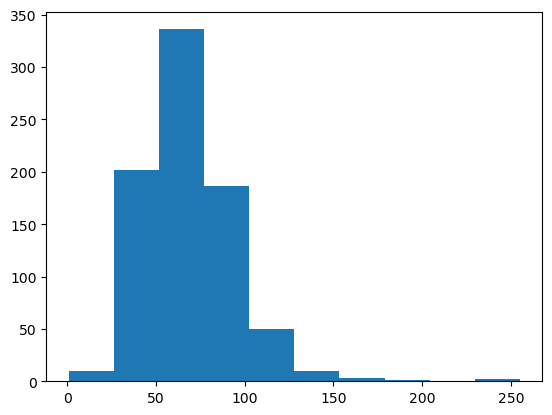

In [119]:
plt.hist(df['HP'])
plt.show()

Атаки покемона

Гистограмма: две переменные на одном графике

Как мы узнали из прошлой части, гистограмма показывает распределение численных значений. Давайте попробуем визуализировать диапозон атаки покемонов, чтобы узнать пропорции «сильных» и «слабых». А также понять, какова примерная мода значений. В используемой базе данных переменная именуется Attack.

In [122]:
df['Attack'].mode()

0    100
Name: Attack, dtype: int64

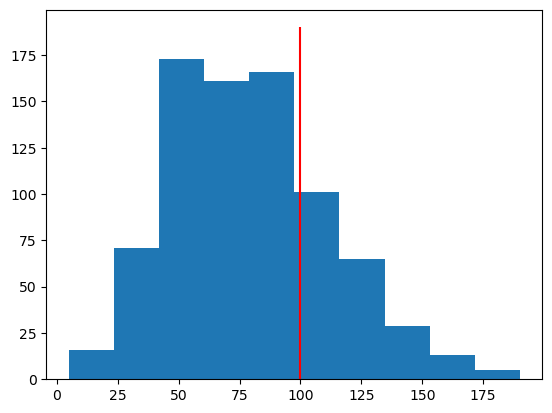

In [126]:
# plt.hist(df[['HP', 'Attack']])
plt.hist(df['Attack'])
plt.vlines(x = df['Attack'].mode(), ymin=0, ymax = df['Attack'].max(), colors='red')
plt.show()

Работа над ошибками

Гистограмма: прозрачность

Отлично! Вы получили нужный результат. Но на такой график не очень удобно смотреть, правда?

Удобно подмечать, что не так с графиком, когда представляешь, что на него смотрит посторонний человек. Кратко пройдемся по ошибкам:

Его колонки имеют сплошную заливку. Так неудобно смотреть на некоторые значения.
Непонятно, каким цветом выделяется обычная атака, а каким – специальная.
Что на графике изображено в принципе?
Для полного понимания происходящего исправим наш график. Сначала настроим прозрачность переменных. В строках каждой переменных в методе plt.hist укажем параметр alpha и приравняем его к 0.5.

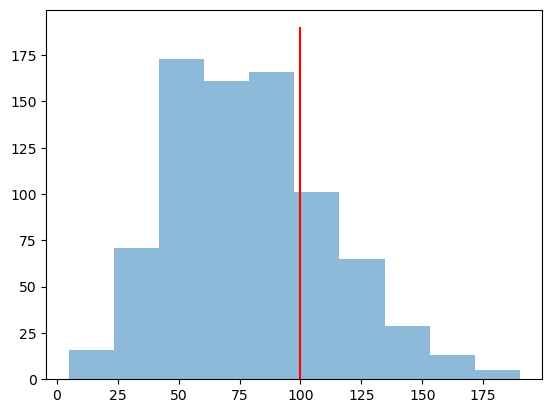

In [127]:
plt.hist(df['Attack'], alpha = 0.5)
plt.vlines(x = df['Attack'].mode(), ymin=0, ymax = df['Attack'].max(), colors='red')
plt.show()

Легенда графика

Гистограмма: легенда

В строках с переменными в функции plt.hist добавим аргументы label, чтобы присвоить переменной название, отражающееся в легенде. Пропишем, что label="Обычная атака" и в строке со специальной атакой label="Специальная атака". После этого добавим строчку plt.legend(), чтобы вывести эти названия в легенду.

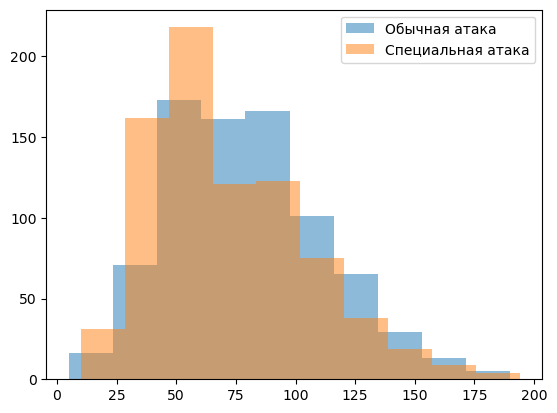

In [134]:
plt.hist(df['Attack'], alpha = 0.5, label = 'Обычная атака')
plt.hist(df['SpAtk'], alpha = 0.5, label = 'Специальная атака')
# plt.vlines(x = df['Attack'].mode(), ymin=0, ymax = df['Attack'].max(), colors='red')
plt.legend()
plt.show()

Подписи к осям

Гистограмма: подписи к осям

Используем предыдущий график. Подпишем оси графика с помощью команд `plt.xlabel('Название оси')` и `plt.ylabel('Название оси')`. Для оси X укажите значение "Мощность атаки", а для Y - "Количество покемонов".

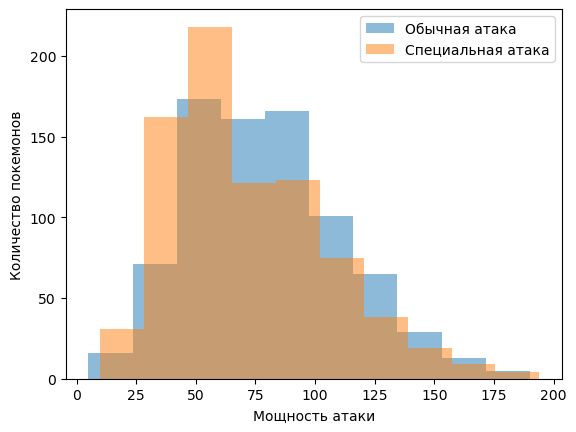

In [135]:
plt.hist(df['Attack'], alpha = 0.5, label = 'Обычная атака')
plt.hist(df['SpAtk'], alpha = 0.5, label = 'Специальная атака')
# plt.vlines(x = df['Attack'].mode(), ymin=0, ymax = df['Attack'].max(), colors='red')
plt.xlabel("Мощность атаки")
plt.ylabel("Количество покемонов")
plt.legend()
plt.show()

Соотношение атаки и защиты

Точечная диаграмма

Взглянем на соотношение стандартной атаки и стандартной защиты покемонов. Правда ли, что чем покемон сильнее, тем больше его защита? Постройте точечную диаграмму, чтобы проверить это. Переменная с характеристикой атаки: `'Attack'`. Переменная с характеристикой защиты: `'Defense'`.

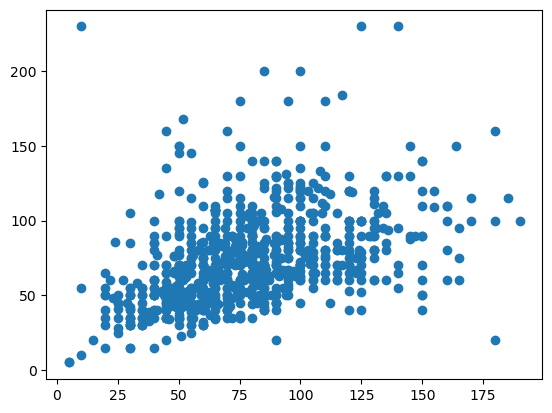

In [137]:
plt.scatter(df['Attack'], df['Defense'])
plt.show()

Прозрачность

Точечная диаграмма: прозрачность

На прошлом шаге мы построили точечную диаграмму. Теперь давайте сделаем точки прозрачнее, чтобы была видна кучность результатов. Для этого прямо внутри функции `plt.scatter` нужно ввести параметр `alpha`. Сделаем его значение равным 0.3.

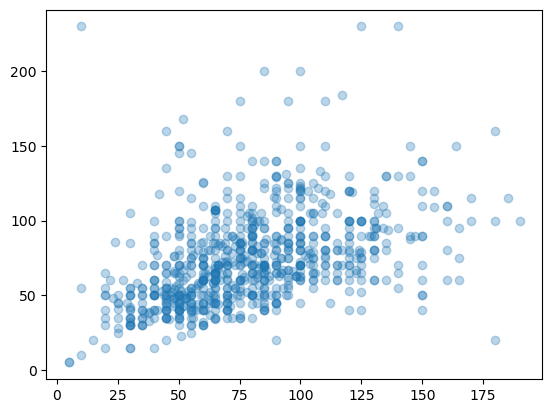

In [138]:
plt.scatter(df['Attack'], df['Defense'], alpha = 0.3)
plt.show()

Типы покемонов

Столбчатая диаграмма

Визуализируем частоту наблюдений по типам покемонов. Информация о типаже покемона заложена в переменной `'Type1'`. Отразим частоту наблюдений по категориям с помощью столбчатой диаграммы. Напомним, что синтаксис барчарта выглядит следующим образом: `df['variable'].value_counts().plot(kind = 'bar')`

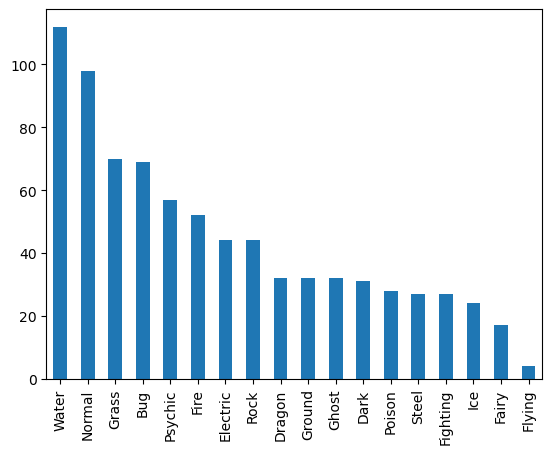

In [147]:
df['Type1'].value_counts().plot(kind = 'bar')
plt.show()

Несколько переменных

Столбчатая диаграмма: несколько переменных.

Отлично! Теперь попытаемся отобразить две категориальные переменные на одном барчарте. Отразите распределение покемонов по типам и их легендарности. В каких категориях присутствуют легендарные покемоны?

Переменная легендарности обозначена в данных как `'Legendary'`. Помните, что для отражения данных по нескольким категориям нужно их сгруппировать перед визуализацией. Не забывайте о том, что нам понадобится функция `.unstack(0)`, чтобы категории разделялись по цвету. Синтаксис, который может вам пригодиться: `df.groupby('grouping_variable')['categorical_variable'].value_counts().unstack(0).plot(kind = 'bar')`

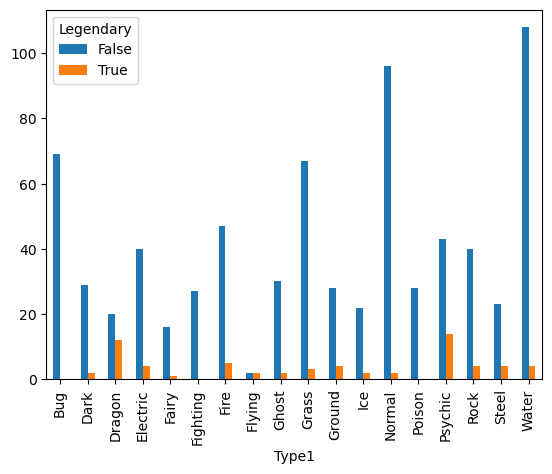

In [157]:
df.groupby('Legendary')['Type1'].value_counts().unstack(0).plot(kind = 'bar')
plt.show()
# [['Type1', 'Legendary']].unstack(0)

Последний штрих

Столбчатая диаграмма: названия осей

Остался последний штрих. Давайте внутри функции `plot()` переименуем оси и добавим название, чтобы было понятно, о чем наша визуализация. За это отвечают параметры `xlabel`, `ylabel`, `title`. Пусть название оси Х будет "Тип покемонов", оси Y — "Количество", а название –"Легендарные покемоны по типам в сравнении с обычными".

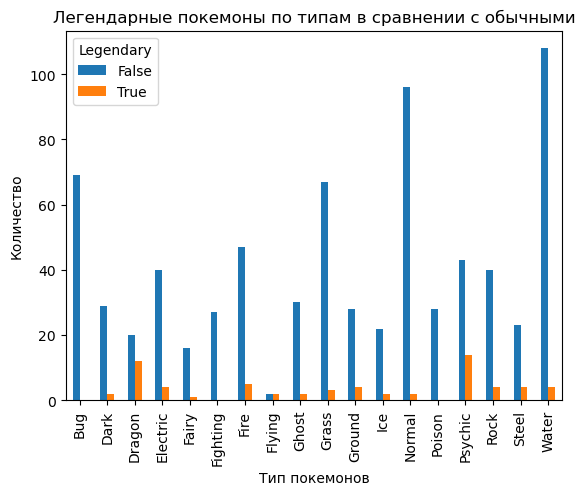

In [158]:
df.groupby('Legendary')['Type1'].value_counts().unstack(0).plot(
    kind = 'bar',
    xlabel="Тип покемонов",
    ylabel="Количество",
    title="Легендарные покемоны по типам в сравнении с обычными")
plt.show()
